In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train_df1=pd.read_csv("C:/Users/hp/Downloads/Analytics Vidhya/meal demand forecasting/train.csv")

In [3]:
train_df1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train_df1.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [5]:
train_df2=pd.read_csv("C:/Users/hp/Downloads/Analytics Vidhya/meal demand forecasting/fulfilment_center_info.csv")
train_df3=pd.read_csv("C:/Users/hp/Downloads/Analytics Vidhya/meal demand forecasting/meal_info.csv")


In [6]:
train_df2.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
train_df2.describe()

,center_id,city_code,region_code,op_area
count,77.000000,77.000000,77.000000,77.000000
mean,83.142857,600.662338,56.493506,3.985714
std,46.090219,66.720274,18.126473,1.106406
min,10.000000,456.000000,23.000000,0.900000
25%,50.000000,553.000000,34.000000,3.500000
50%,77.000000,596.000000,56.000000,3.900000
75%,110.000000,651.000000,77.000000,4.400000
max,186.000000,713.000000,93.000000,7.000000


In [8]:
train_df3.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [9]:
train_df3.describe()

,meal_id
count,51.000000
mean,2013.921569
std,553.633555
min,1062.000000
25%,1550.500000
50%,1971.000000
75%,2516.500000
max,2956.000000


In [10]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [11]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [12]:
train_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [13]:
train_df4=pd.merge(train_df1, train_df2, on = 'center_id')
train_df5=pd.merge(train_df4, train_df3, on = 'meal_id')

In [14]:
train_df4.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [15]:
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 13 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 48.8+ MB


In [16]:
train_df5.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [17]:
col_list=list(train_df5)
col_list

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine']

In [18]:
#swapping two columns

train_df5=train_df5[['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'num_orders']]

In [19]:
train_df5.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,city_code,region_code,center_type,op_area,category,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,Thai,647,56,TYPE_C,2.0,Beverages,177
1,1018704,2,55,1885,135.83,152.29,0,0,Thai,647,56,TYPE_C,2.0,Beverages,323
2,1196273,3,55,1885,132.92,133.92,0,0,Thai,647,56,TYPE_C,2.0,Beverages,96
3,1116527,4,55,1885,135.86,134.86,0,0,Thai,647,56,TYPE_C,2.0,Beverages,163
4,1343872,5,55,1885,146.50,147.50,0,0,Thai,647,56,TYPE_C,2.0,Beverages,215


In [20]:
X=train_df5.iloc[0:456548,0:14]
X.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,city_code,region_code,center_type,op_area,category
0,1379560,1,55,1885,136.83,152.29,0,0,Thai,647,56,TYPE_C,2.0,Beverages
1,1018704,2,55,1885,135.83,152.29,0,0,Thai,647,56,TYPE_C,2.0,Beverages
2,1196273,3,55,1885,132.92,133.92,0,0,Thai,647,56,TYPE_C,2.0,Beverages
3,1116527,4,55,1885,135.86,134.86,0,0,Thai,647,56,TYPE_C,2.0,Beverages
4,1343872,5,55,1885,146.50,147.50,0,0,Thai,647,56,TYPE_C,2.0,Beverages


In [21]:
Y=train_df5.loc[:,'num_orders']
Y.head()

0    177
1    323
2     96
3    163
4    215
Name: num_orders, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [23]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365238 entries, 141016 to 305711
Data columns (total 14 columns):
id                       365238 non-null int64
week                     365238 non-null int64
center_id                365238 non-null int64
meal_id                  365238 non-null int64
checkout_price           365238 non-null float64
base_price               365238 non-null float64
emailer_for_promotion    365238 non-null int64
homepage_featured        365238 non-null int64
cuisine                  365238 non-null object
city_code                365238 non-null int64
region_code              365238 non-null int64
center_type              365238 non-null object
op_area                  365238 non-null float64
category                 365238 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 41.8+ MB


In [24]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91310 entries, 242838 to 82834
Data columns (total 14 columns):
id                       91310 non-null int64
week                     91310 non-null int64
center_id                91310 non-null int64
meal_id                  91310 non-null int64
checkout_price           91310 non-null float64
base_price               91310 non-null float64
emailer_for_promotion    91310 non-null int64
homepage_featured        91310 non-null int64
cuisine                  91310 non-null object
city_code                91310 non-null int64
region_code              91310 non-null int64
center_type              91310 non-null object
op_area                  91310 non-null float64
category                 91310 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 10.4+ MB


In [25]:
xtrain.homepage_featured.value_counts()


0    325375
1     39863
Name: homepage_featured, dtype: int64

In [26]:
xtest.homepage_featured.value_counts()

0    81318
1     9992
Name: homepage_featured, dtype: int64

In [27]:
xtrain.category.value_counts()


Beverages       102244
Sandwich         26660
Rice Bowl        26564
Pizza            26507
Starters         23973
Desert           23478
Other Snacks     23478
Salad            22952
Pasta            22139
Seafood          21609
Biryani          16533
Extras           10869
Soup             10121
Fish              8111
Name: category, dtype: int64

In [28]:
xtrain.cuisine.value_counts()

Italian        98414
Thai           94576
Indian         89954
Continental    82294
Name: cuisine, dtype: int64

In [29]:
xtrain.region_code.value_counts()


56    152605
34     93338
77     75929
85     24380
23      5138
71      5042
93      4562
35      4244
Name: region_code, dtype: int64

In [30]:
print(xtrain.city_code.value_counts())

590    43755
526    34838
638    15985
522    10702
517    10486
604    10428
699     9748
647     9425
576     9156
614     9126
676     8891
593     8729
685     5606
700     5540
713     5506
579     5477
679     5373
703     5370
456     5323
698     5138
577     5112
596     5042
599     4989
659     4909
648     4903
651     4828
628     4827
602     4818
654     4798
562     4758
556     4719
615     4687
561     4669
473     4662
461     4655
675     4605
485     4562
609     4562
620     4539
658     4497
553     4444
649     4434
680     4320
702     4244
683     4236
695     4224
632     4207
515     4114
478     4003
693     3647
541     3622
Name: city_code, dtype: int64


In [31]:
xtrain.center_type.value_counts()


TYPE_A    210185
TYPE_C     79790
TYPE_B     75263
Name: center_type, dtype: int64

In [32]:
xtest.center_type.value_counts()


TYPE_A    52696
TYPE_C    19803
TYPE_B    18811
Name: center_type, dtype: int64

In [33]:
xtrain.op_area.value_counts()

4.0    42046
3.9    38823
3.8    32113
4.4    20857
4.5    20469
2.8    20467
4.1    18619
7.0    16529
4.8    14907
3.4    13808
3.6    13405
5.1    10682
4.2    10010
2.7     9910
3.0     9031
2.0     7662
6.7     5647
5.6     5606
6.3     5560
3.7     5373
3.5     5327
3.2     5075
5.0     4941
5.3     4909
4.7     4828
4.6     4827
2.4     4003
2.9     3786
1.9     3280
0.9     2738
Name: op_area, dtype: int64

In [34]:
#train_df5.num_orders.value_counts()

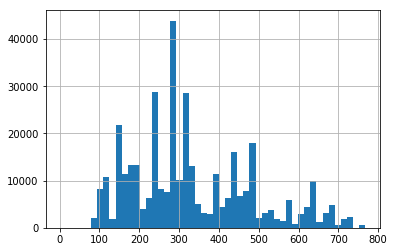

In [35]:
xtrain['checkout_price'].hist(bins=50)

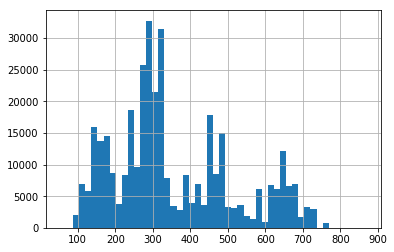

In [36]:
xtrain['base_price'].hist(bins=50)

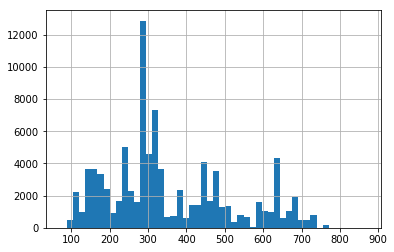

In [37]:
xtest['base_price'].hist(bins=50)

In [38]:
import scipy.stats as st

In [39]:
xtrain.corr(method='pearson')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area
id,1.000000,0.003152,0.002449,0.000736,0.002037,0.003136,0.001890,0.002826,-0.000049,-0.000618,0.000143
week,0.003152,1.000000,-0.002565,0.019532,0.026322,0.028522,-0.002037,-0.007903,0.000347,0.005689,0.000735
center_id,0.002449,-0.002565,1.000000,0.007886,0.002852,0.002104,0.013349,-0.005441,0.061539,-0.004227,-0.110577
meal_id,0.000736,0.019532,0.007886,1.000000,0.009723,0.001583,0.013686,0.015684,-0.003916,-0.000694,-0.000830
checkout_price,0.002037,0.026322,0.002852,0.009723,1.000000,0.953242,0.004813,-0.056728,-0.005612,-0.003111,0.023713
base_price,0.003136,0.028522,0.002104,0.001583,0.953242,1.000000,0.171465,0.057365,-0.003059,-0.001016,0.020178
emailer_for_promotion,0.001890,-0.002037,0.013349,0.013686,0.004813,0.171465,1.000000,0.390149,-0.005448,-0.007809,-0.019604
homepage_featured,0.002826,-0.007903,-0.005441,0.015684,-0.056728,0.057365,0.390149,1.000000,0.008564,0.002877,0.041164
city_code,-0.000049,0.000347,0.061539,-0.003916,-0.005612,-0.003059,-0.005448,0.008564,1.000000,0.044065,0.132032
region_code,-0.000618,0.005689,-0.004227,-0.000694,-0.003111,-0.001016,-0.007809,0.002877,0.044065,1.000000,0.023111


So, num_orders is mainly correlated with checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area

In [40]:
xtrain.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,city_code,region_code,center_type,op_area,category
141016,1136831,129,89,1727,464.63,465.63,0,0,Indian,703,56,TYPE_A,4.8,Rice Bowl
406574,1173698,89,149,2569,310.43,309.43,0,0,Italian,478,77,TYPE_A,2.4,Salad
189872,1343343,100,51,2126,534.53,532.53,0,0,Italian,638,56,TYPE_A,7.0,Pasta
323934,1295774,117,161,2304,387.03,472.39,0,0,Indian,658,34,TYPE_B,3.9,Desert
142275,1311191,85,91,1727,403.55,446.23,0,1,Indian,590,56,TYPE_C,0.9,Rice Bowl


In [41]:
xtrain=xtrain.iloc[:,1:]
xtrain.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,city_code,region_code,center_type,op_area,category
141016,129,89,1727,464.63,465.63,0,0,Indian,703,56,TYPE_A,4.8,Rice Bowl
406574,89,149,2569,310.43,309.43,0,0,Italian,478,77,TYPE_A,2.4,Salad
189872,100,51,2126,534.53,532.53,0,0,Italian,638,56,TYPE_A,7.0,Pasta
323934,117,161,2304,387.03,472.39,0,0,Indian,658,34,TYPE_B,3.9,Desert
142275,85,91,1727,403.55,446.23,0,1,Indian,590,56,TYPE_C,0.9,Rice Bowl


In [42]:
xtest=xtest.iloc[:,1:]
xtest.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,city_code,region_code,center_type,op_area,category
242838,135,20,1558,549.08,641.23,1,1,Continental,522,56,TYPE_A,4.0,Pizza
314826,141,42,2704,319.13,320.13,0,0,Thai,561,77,TYPE_B,3.9,Other Snacks
57041,114,153,1248,153.26,155.26,0,0,Indian,590,56,TYPE_A,3.9,Beverages
87123,36,66,2707,227.01,227.01,0,0,Italian,648,34,TYPE_A,4.1,Beverages
154611,128,75,1109,309.43,309.43,0,0,Indian,651,77,TYPE_B,4.7,Rice Bowl


In [43]:
F,p=st.f_oneway(train_df5[train_df5.center_type=='TYPE_A'].num_orders,
               train_df5[train_df5.center_type=='TYPE_B'].num_orders,
               train_df5[train_df5.center_type=='TYPE_C'].num_orders,)
#correlation between categorical and continuous variable

In [44]:
print(F)

1959.2938339271484


higher F value means higher coorelation

In [45]:
list(xtrain)

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category']

In [46]:
x_train=xtrain.loc[:,['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category']]

In [47]:
x_test=xtest.loc[:,['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category']]

In [48]:
x_train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,city_code,region_code,center_type,op_area,category
141016,129,89,1727,464.63,465.63,0,0,Indian,703,56,TYPE_A,4.8,Rice Bowl
406574,89,149,2569,310.43,309.43,0,0,Italian,478,77,TYPE_A,2.4,Salad
189872,100,51,2126,534.53,532.53,0,0,Italian,638,56,TYPE_A,7.0,Pasta
323934,117,161,2304,387.03,472.39,0,0,Indian,658,34,TYPE_B,3.9,Desert
142275,85,91,1727,403.55,446.23,0,1,Indian,590,56,TYPE_C,0.9,Rice Bowl


In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()

In [50]:
#x_train=x_train.iloc[:,:].values



In [51]:
x_train.iloc[:,0]=le.fit_transform(x_train.iloc[:,0])
x_test.iloc[:,0]=le.fit_transform(x_test.iloc[:,0])

In [52]:
x_train.iloc[:,1]=le.fit_transform(x_train.iloc[:,1])
x_test.iloc[:,1]=le.fit_transform(x_test.iloc[:,1])

In [53]:
x_train.iloc[:,2]=le.fit_transform(x_train.iloc[:,2])
x_test.iloc[:,2]=le.fit_transform(x_test.iloc[:,2])

In [54]:
x_train.iloc[:,7]=le.fit_transform(x_train.iloc[:,7])
x_test.iloc[:,7]=le.fit_transform(x_test.iloc[:,7])

In [55]:
x_train.iloc[:,8]=le.fit_transform(x_train.iloc[:,8])
x_test.iloc[:,8]=le.fit_transform(x_test.iloc[:,8])

In [56]:
x_train.iloc[:,9]=le.fit_transform(x_train.iloc[:,9])
x_test.iloc[:,9]=le.fit_transform(x_test.iloc[:,9])

In [57]:
x_train.iloc[:,10]=le.fit_transform(x_train.iloc[:,10])
x_test.iloc[:,10]=le.fit_transform(x_test.iloc[:,10])

In [58]:
x_train.iloc[:,12]=le.fit_transform(x_train.iloc[:,12])
x_test.iloc[:,12]=le.fit_transform(x_test.iloc[:,12])

In [59]:
x_train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,city_code,region_code,center_type,op_area,category
141016,128,44,15,464.63,465.63,0,0,1,49,3,0,4.8,8
406574,88,68,39,310.43,309.43,0,0,2,3,5,0,2.4,9
189872,99,20,28,534.53,532.53,0,0,2,29,3,0,7.0,6
323934,116,72,31,387.03,472.39,0,0,1,35,1,1,3.9,2
142275,84,45,15,403.55,446.23,0,1,1,17,3,2,0.9,8


In [60]:
x_test.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,city_code,region_code,center_type,op_area,category
242838,134,5,13,549.08,641.23,1,1,0,7,3,0,4.0,7
314826,140,17,45,319.13,320.13,0,0,3,12,5,1,3.9,5
57041,113,70,7,153.26,155.26,0,0,1,17,3,0,3.9,0
87123,35,30,46,227.01,227.01,0,0,2,31,1,0,4.1,0
154611,127,36,1,309.43,309.43,0,0,1,33,5,1,4.7,8


In [61]:
df1=x_train.copy()

In [62]:
x_train['emailer_for_promotion'].value_counts()

0    335643
1     29595
Name: emailer_for_promotion, dtype: int64

In [63]:
train_df5['emailer_for_promotion'].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [64]:
ohe=OneHotEncoder()
ohe1=OneHotEncoder()

In [65]:
ohe=OneHotEncoder(categorical_features=[1])
x_train=ohe.fit_transform(x_train).toarray()
#print(x_train[0:3,:])

In [66]:
ohe=OneHotEncoder(categorical_features=[78])
x_train=ohe.fit_transform(x_train).toarray()
#print(x_train[0:3,:])

In [67]:
ohe=OneHotEncoder(categorical_features=[131])
x_train=ohe.fit_transform(x_train).toarray()
#print(x_train[0:3,:])

In [68]:
ohe=OneHotEncoder(categorical_features=[133])
x_train=ohe.fit_transform(x_train).toarray()
#print(x_train[0:3,:])

In [69]:
ohe=OneHotEncoder(categorical_features=[135])
x_train=ohe.fit_transform(x_train).toarray()
#print(x_train[0:3,:])

In [70]:
ohe=OneHotEncoder(categorical_features=[139])
x_train=ohe.fit_transform(x_train).toarray()
#print(x_train[0:3,:])

In [71]:
ohe=OneHotEncoder(categorical_features=[190])
x_train=ohe.fit_transform(x_train).toarray()
#print(x_train[0:3,:])

In [72]:
ohe=OneHotEncoder(categorical_features=[198])
x_train=ohe.fit_transform(x_train).toarray()
#print(x_train[0:3,:])

In [73]:
ohe=OneHotEncoder(categorical_features=[202])
x_train=ohe.fit_transform(x_train).toarray()
#print(x_train[0:3,:])

In [74]:
ohe1=OneHotEncoder(categorical_features=[1])
x_test=ohe1.fit_transform(x_test).toarray()
#print(x_test[0:3,:])

In [75]:
ohe1=OneHotEncoder(categorical_features=[78])
x_test=ohe1.fit_transform(x_test).toarray()
#print(x_test[0:3,:])

In [76]:
ohe1=OneHotEncoder(categorical_features=[131])
x_test=ohe1.fit_transform(x_test).toarray()
#print(x_test[0:3,:])

In [77]:
ohe1=OneHotEncoder(categorical_features=[133])
x_test=ohe1.fit_transform(x_test).toarray()
#print(x_test[0:3,:])

In [78]:
ohe1=OneHotEncoder(categorical_features=[135])
x_test=ohe1.fit_transform(x_test).toarray()
#print(x_test[0:3,:])

In [79]:
ohe1=OneHotEncoder(categorical_features=[139])
x_test=ohe1.fit_transform(x_test).toarray()
#print(x_test[0:3,:])

In [80]:
ohe1=OneHotEncoder(categorical_features=[190])
x_test=ohe1.fit_transform(x_test).toarray()
#print(x_test[0:3,:])

In [81]:
ohe1=OneHotEncoder(categorical_features=[198])
x_test=ohe1.fit_transform(x_test).toarray()
#print(x_test[0:3,:])

In [82]:
ohe1=OneHotEncoder(categorical_features=[202])
x_test=ohe1.fit_transform(x_test).toarray()
#print(x_test[0:3,:])

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
model1=LinearRegression()

In [85]:
model1.fit(x_train,ytrain)
#model1.fit(df1,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
model1.score(x_train,ytrain)
#model1.score(df1,ytrain)

0.48392370109564703

In [87]:
model1.score(x_test,ytest)

0.4833320203206588

In [88]:
y_pred=model1.predict(x_test)

In [89]:
df2=pd.DataFrame({'Actual':ytest,'Predicted':y_pred})
df2.head()


,Actual,Predicted
242838,162,515.810787
314826,94,-11.643566
57041,54,24.907200
87123,459,541.679970
154611,607,534.941246


Comparision between actual and predicted

In [90]:
#print('Coefficient : ',model1.coef_)
#print('Intercept : ',model1.intercept_)